In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = pd.read_csv('../data/train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C


In [8]:
# feature
X = titanic.drop('Survived', axis=1)
#target
y = titanic['Survived']

In [9]:
# Import train-test-split
from sklearn.model_selection import train_test_split

In [10]:
# The function train_test_split() randomly separate the data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [11]:
# Always check the shape of your train and test arrays to check if this was done correctly
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

Exploring the Data

In [12]:
df_titanic = X_train
df_titanic['Survived'] = y_train
df_titanic.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0


In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          572 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        159 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [14]:
df_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000,712.000000
mean,448.234551,2.330056,29.498846,0.553371,0.379213,32.586276,0.376404
std,256.731423,0.824584,14.500059,1.176404,0.791669,51.969529,0.484824
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.750000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,453.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,673.500000,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


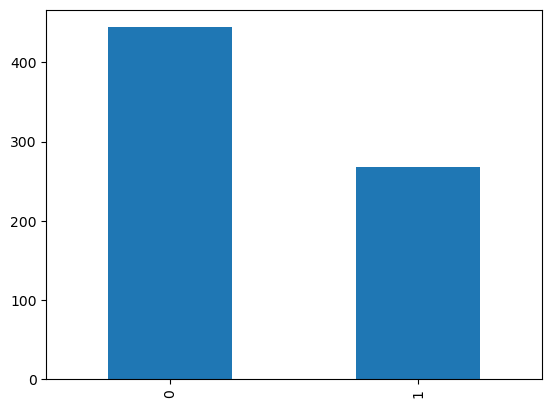

In [15]:
#Step2: Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

df_titanic['Survived'].value_counts().plot.bar();

Step3: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [16]:
#calculate sum of total first class passengers

Pclass_all = (df_titanic['Pclass']==1).sum()
Pclass_all

163

In [17]:
total_sur = ((df_titanic['Survived'] == 1) & (df_titanic['Pclass']==1)).sum()
total_sur/Pclass_all

0.6073619631901841

Step4: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

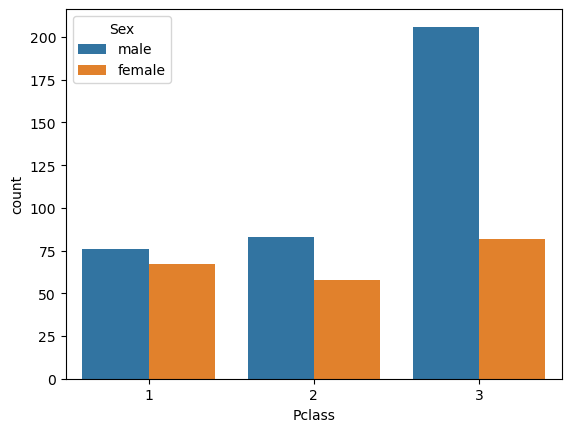

In [29]:
sns.countplot(
    data=df_titanic,
    x='Pclass',
    hue='Sex'
);

Step5: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

In [19]:
df_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,1
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0
435,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,1


In [20]:
df_titanic = df_titanic.dropna(subset=['Age'])
df_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,0
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,1
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0
435,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,1


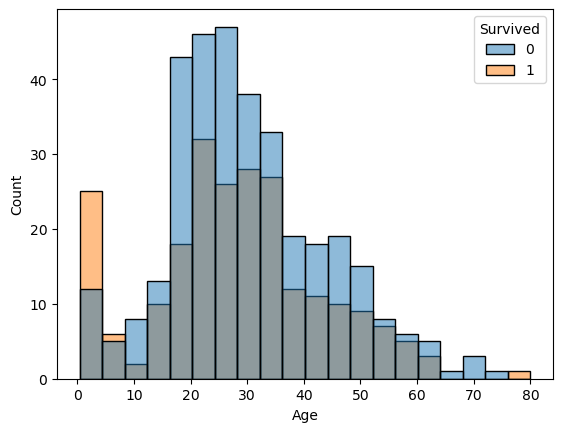

In [21]:
sns.histplot(
    data=df_titanic,
    x='Age',
    hue='Survived'
);

Calculate the average age for survived and drowned passengers separately.

In [22]:
avg_age_survived = df_titanic[df_titanic['Survived']==1]['Age'].mean()
avg_age_survived

28.45189655172414

In [23]:
avg_age_drowned = df_titanic[df_titanic['Survived']==0]['Age'].mean()
avg_age_drowned

30.21323529411765

Replace missing age values by the mean age.

In [26]:
mean_age = df_titanic['Age'].mean()
mean_age

29.498846153846156

In [27]:
df_titanic['Age'].fillna(mean_age)
df_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,0
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,1
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0
435,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,1


Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [43]:
df_titanic[['Pclass', 'Survived', 'Sex']]

,Pclass,Survived,Sex
331,1,0,male
733,2,0,male
382,3,0,male
704,3,0,male
813,3,0,female
...,...,...,...
71,3,0,female
106,3,1,female
860,3,0,male
435,1,1,female
